In [1]:
import gc
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [2]:
n_inds = 30
folders = ['0084', '0115', '0120']

angle_thresh = 30
time_thresh = 5
thresh_folder = 'angle' + str(angle_thresh) + '_time' + str(time_thresh)

In [3]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [4]:
for i,name in enumerate(folders):
    files = sorted(glob.glob('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Data/Output/golden_shiners/' + str(n_inds) + '_fish/' + name + '/' + thresh_folder + '/individual*.csv'))
    
    for j,file in enumerate(files):
        suffix = file[169:171]
        tmp = pd.read_csv(file)

        drops = ['Unnamed: 0', 'size', 'speed', 'acceleration', 'dev_gspeed', 'dev_gacc', 'frame', 'rx', 'ry', 'lfinal']
        tmp.drop(drops, axis=1, inplace=True)

        reach_col = 'reach_' + suffix
        score_col = 'lscore_' + suffix
        tmp.rename({'reach': reach_col}, axis=1, inplace=True)
        tmp.rename({'lscore': score_col}, axis=1, inplace=True)
        tmp = tmp.groupby(['f_id']).mean()
        tmp = tmp.reset_index()

        if j != 0:
            scales = pd.merge(scales,tmp)
        else:
            scales = tmp
    
    scales['vid_id'] = i
    
    if i != 0:
        df1 = pd.concat([scales,df1])
    else:
        df1 = scales

In [5]:
df1_corr = df1.drop(['f_id', 'vid_id', 'lscore_07', 'lscore_15', 'lscore_30', 'lscore_60'], axis=1)
lcorr1 = np.array(df1_corr.corr())

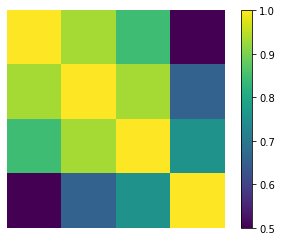

In [6]:
plt.imshow(lcorr1, cmap='viridis', vmin=0.5, vmax=1)
plt.axis('off')
plt.colorbar()
plt.show()

In [7]:
df1['f_id'] = df1['f_id'].astype(str)
df1['reach_07'] /= np.sum(df1['reach_07'])
df1['reach_15'] /= np.sum(df1['reach_15'])
df1['reach_30'] /= np.sum(df1['reach_30'])
df1['reach_60'] /= np.sum(df1['reach_60'])

df1_sorted1 = df1.sort_values('reach_07', ascending=False)
df1_sorted2 = df1.sort_values('reach_15', ascending=False)
df1_sorted3 = df1.sort_values('reach_30', ascending=False)
df1_sorted4 = df1.sort_values('reach_60', ascending=False)

df1_sorted1['idx'] = np.arange(0,len(df1_sorted1),1)
df1_sorted2['idx'] = np.arange(0,len(df1_sorted2),1)
df1_sorted3['idx'] = np.arange(0,len(df1_sorted3),1)
df1_sorted4['idx'] = np.arange(0,len(df1_sorted4),1)

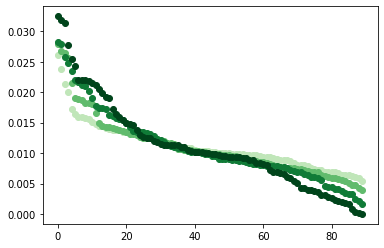

In [8]:
ncols = 12
cmap = cm.get_cmap('Greens', ncols)

plt.scatter(df1_sorted1['idx'], df1_sorted1['reach_07'], color=cmap(ncols-9))
plt.scatter(df1_sorted2['idx'], df1_sorted2['reach_15'], color=cmap(ncols-6))
plt.scatter(df1_sorted3['idx'], df1_sorted3['reach_30'], color=cmap(ncols-3))
plt.scatter(df1_sorted4['idx'], df1_sorted4['reach_60'], color=cmap(ncols-1))
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Figures/golden_shiners/' + thresh_folder + '/ldist_' + str(n_inds) + '.png', format='png', dpi=600, bbox_inches="tight")

In [9]:
for i,grp in enumerate(np.unique(df1['vid_id'])):
    tmp = [gini(df1.loc[df1['vid_id'] == grp, 'reach_07']), gini(df1.loc[df1['vid_id'] == grp, 'reach_15']), 
             gini(df1.loc[df1['vid_id'] == grp, 'reach_30']), gini(df1.loc[df1['vid_id'] == grp, 'reach_60'])]
    idx = ['7','15','30','60']
    tmp = pd.DataFrame(np.array([idx, tmp]).T, columns=['timescale', 'gini'])
    tmp['vid_id'] = grp
    
    if i != 0:
        ginis1 = pd.concat([ginis1, tmp], axis=0)
    else:
        ginis1 = tmp

In [10]:
ginis1['gini'] = ginis1['gini'].astype('float64')
ginis1['timescale'] = ginis1['timescale'].astype(str)

([<matplotlib.axis.YTick at 0x126ef94f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

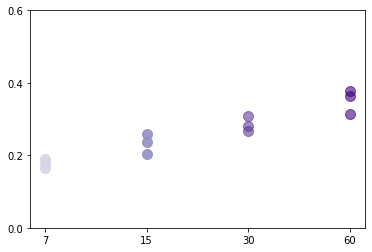

In [11]:
cmap = cm.get_cmap('Purples', ncols)

plt.scatter(ginis1.loc[ginis1['timescale'] == '7', 'timescale'], ginis1.loc[ginis1['timescale'] == '7', 'gini'], color=cmap(ncols-9), s=100, alpha=0.9)
plt.scatter(ginis1.loc[ginis1['timescale'] == '15', 'timescale'], ginis1.loc[ginis1['timescale'] == '15', 'gini'], color=cmap(ncols-6), s=100, alpha=0.9)
plt.scatter(ginis1.loc[ginis1['timescale'] == '30', 'timescale'], ginis1.loc[ginis1['timescale'] == '30', 'gini'], color=cmap(ncols-3), s=100, alpha=0.6)
plt.scatter(ginis1.loc[ginis1['timescale'] == '60', 'timescale'], ginis1.loc[ginis1['timescale'] == '60', 'gini'], color=cmap(ncols-1), s=100, alpha=0.6)
plt.ylim(0,0.6)
plt.yticks([0.0,0.2,0.4,0.6])

In [12]:
n_inds = 10
folders = ['0066', '0105', '0126']

In [13]:
for i,name in enumerate(folders):
    files = sorted(glob.glob('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Data/Output/golden_shiners/' + str(n_inds) + '_fish/' + name + '/' + thresh_folder + '/individual*.csv'))
    
    for j,file in enumerate(files):
        suffix = file[169:171]
        tmp = pd.read_csv(file)

        drops = ['Unnamed: 0', 'size', 'speed', 'acceleration', 'dev_gspeed', 'dev_gacc', 'frame', 'rx', 'ry', 'lfinal']
        tmp.drop(drops, axis=1, inplace=True)

        reach_col = 'reach_' + suffix
        score_col = 'lscore_' + suffix
        tmp.rename({'reach': reach_col}, axis=1, inplace=True)
        tmp.rename({'lscore': score_col}, axis=1, inplace=True)
        tmp = tmp.groupby(['f_id']).mean()
        tmp = tmp.reset_index()

        if j != 0:
            scales = pd.merge(scales,tmp)
        else:
            scales = tmp
    
    scales['vid_id'] = i
    
    if i != 0:
        df2 = pd.concat([scales,df2])
    else:
        df2 = scales

In [14]:
df2_corr = df2.drop(['f_id', 'vid_id', 'lscore_07', 'lscore_15', 'lscore_30', 'lscore_60'], axis=1)
lcorr2 = np.array(df2_corr.corr())

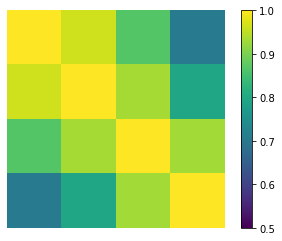

In [15]:
plt.imshow(lcorr2, cmap='viridis', vmin=0.5, vmax=1)
plt.axis('off')
plt.colorbar()
plt.show()

In [16]:
df2_gini = df2.copy()

df2['u_fid'] = df2['f_id'] + df2['vid_id']*n_inds
df2['u_fid'] = df2['u_fid'].astype(str)

In [17]:
df2['f_id'] = df2['f_id'].astype(str)
df2['reach_07'] /= np.sum(df2['reach_07'])
df2['reach_15'] /= np.sum(df2['reach_15'])
df2['reach_30'] /= np.sum(df2['reach_30'])
df2['reach_60'] /= np.sum(df2['reach_60'])

df2_sorted1 = df2.sort_values('reach_07', ascending=False)
df2_sorted2 = df2.sort_values('reach_15', ascending=False)
df2_sorted3 = df2.sort_values('reach_30', ascending=False)
df2_sorted4 = df2.sort_values('reach_60', ascending=False)

df2_sorted1['idx'] = np.arange(0,len(df2_sorted1),1)
df2_sorted2['idx'] = np.arange(0,len(df2_sorted2),1)
df2_sorted3['idx'] = np.arange(0,len(df2_sorted3),1)
df2_sorted4['idx'] = np.arange(0,len(df2_sorted4),1)

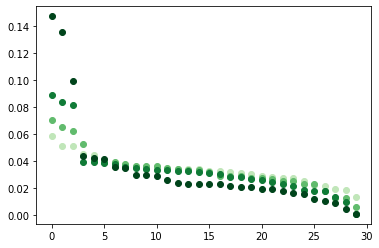

In [18]:
ncols = 12
cmap = cm.get_cmap('Greens', ncols)

plt.scatter(df2_sorted1['idx'], df2_sorted1['reach_07'], color=cmap(ncols-9))
plt.scatter(df2_sorted2['idx'], df2_sorted2['reach_15'], color=cmap(ncols-6))
plt.scatter(df2_sorted3['idx'], df2_sorted3['reach_30'], color=cmap(ncols-3))
plt.scatter(df2_sorted4['idx'], df2_sorted4['reach_60'], color=cmap(ncols-1))
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Figures/golden_shiners/' + thresh_folder + '/ldist_' + str(n_inds) + '.png', format='png', dpi=600, bbox_inches="tight")

In [19]:
for i,grp in enumerate(np.unique(df2_gini['vid_id'])):
    tmp = [gini(df2_gini.loc[df2_gini['vid_id'] == grp, 'reach_07']), gini(df2_gini.loc[df2_gini['vid_id'] == grp, 'reach_15']), 
             gini(df2_gini.loc[df2_gini['vid_id'] == grp, 'reach_30']), gini(df2_gini.loc[df2_gini['vid_id'] == grp, 'reach_60'])]
    idx = ['7','15','30','60']
    tmp = pd.DataFrame(np.array([idx, tmp]).T, columns=['timescale', 'gini'])
    tmp['vid_id'] = grp
    
    if i != 0:
        ginis2 = pd.concat([ginis2, tmp], axis=0)
    else:
        ginis2 = tmp

In [20]:
ginis2['gini'] = ginis2['gini'].astype('float64')
ginis2['timescale'] = ginis2['timescale'].astype(str)

([<matplotlib.axis.YTick at 0x1270a4d90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

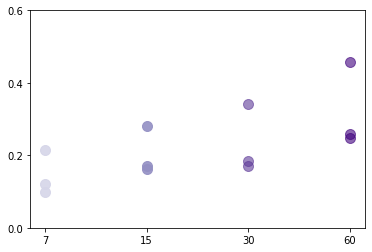

In [21]:
cmap = cm.get_cmap('Purples', ncols)

plt.scatter(ginis2.loc[ginis2['timescale'] == '7', 'timescale'], ginis2.loc[ginis2['timescale'] == '7', 'gini'], color=cmap(ncols-9), s=100, alpha=0.9)
plt.scatter(ginis2.loc[ginis2['timescale'] == '15', 'timescale'], ginis2.loc[ginis2['timescale'] == '15', 'gini'], color=cmap(ncols-6), s=100, alpha=0.9)
plt.scatter(ginis2.loc[ginis2['timescale'] == '30', 'timescale'], ginis2.loc[ginis2['timescale'] == '30', 'gini'], color=cmap(ncols-3), s=100, alpha=0.6)
plt.scatter(ginis2.loc[ginis2['timescale'] == '60', 'timescale'], ginis2.loc[ginis2['timescale'] == '60', 'gini'], color=cmap(ncols-1), s=100, alpha=0.6)
plt.ylim(0,0.6)
plt.yticks([0.0,0.2,0.4,0.6])

#### Overall correlation matrix

In [22]:
df = pd.concat([df1_corr,df2_corr])
lcorr = np.array(df.corr())

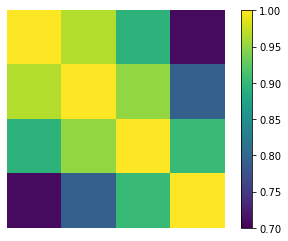

In [23]:
plt.imshow(lcorr, cmap='viridis', vmin=0.7, vmax=1)
plt.axis('off')
plt.colorbar()
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Figures/golden_shiners/' + thresh_folder + '/lcorr.png', format='png', dpi=600, bbox_inches="tight")

#### Overall gini indices

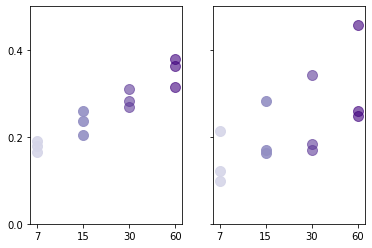

In [24]:
cmap = cm.get_cmap('Purples', ncols)

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.scatter(ginis1.loc[ginis1['timescale'] == '7', 'timescale'], ginis1.loc[ginis1['timescale'] == '7', 'gini'], color=cmap(ncols-9), s=100, alpha=0.9)
ax1.scatter(ginis1.loc[ginis1['timescale'] == '15', 'timescale'], ginis1.loc[ginis1['timescale'] == '15', 'gini'], color=cmap(ncols-6), s=100, alpha=0.9)
ax1.scatter(ginis1.loc[ginis1['timescale'] == '30', 'timescale'], ginis1.loc[ginis1['timescale'] == '30', 'gini'], color=cmap(ncols-3), s=100, alpha=0.6)
ax1.scatter(ginis1.loc[ginis1['timescale'] == '60', 'timescale'], ginis1.loc[ginis1['timescale'] == '60', 'gini'], color=cmap(ncols-1), s=100, alpha=0.6)

ax2.scatter(ginis2.loc[ginis2['timescale'] == '7', 'timescale'], ginis2.loc[ginis2['timescale'] == '7', 'gini'], color=cmap(ncols-9), s=100, alpha=0.9)
ax2.scatter(ginis2.loc[ginis2['timescale'] == '15', 'timescale'], ginis2.loc[ginis2['timescale'] == '15', 'gini'], color=cmap(ncols-6), s=100, alpha=0.9)
ax2.scatter(ginis2.loc[ginis2['timescale'] == '30', 'timescale'], ginis2.loc[ginis2['timescale'] == '30', 'gini'], color=cmap(ncols-3), s=100, alpha=0.6)
ax2.scatter(ginis2.loc[ginis2['timescale'] == '60', 'timescale'], ginis2.loc[ginis2['timescale'] == '60', 'gini'], color=cmap(ncols-1), s=100, alpha=0.6)
ax2.set_ylim(0,0.5)
ax2.set_yticks([0.0,0.2,0.4])
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/DirectionalCorrelation/Figures/golden_shiners/' + thresh_folder + '/gini.png', format='png', dpi=600, bbox_inches="tight")